In [4]:
import mdtraj as md
import numpy as np
import pandas as pd
import csv
import pprint
import matplotlib.pyplot as plt

In [5]:
t = md.load('alanine-dipeptide-nowater.pdb')

In [6]:
top = t.topology

In [23]:
epoch_n = 1
job_n = 5
traj_path = f'./outdir/epoch_{epoch_n}/traj{job_n}.dcd'
traj = md.load_dcd(traj_path, top=top)

(-3.141592653589793, 3.141592653589793)

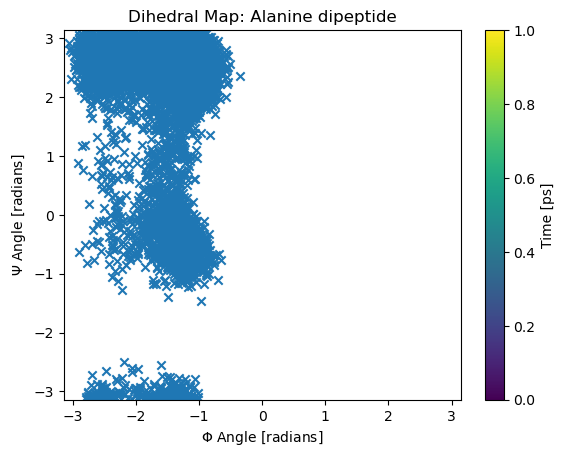

In [24]:
#phi C-N-CT-C psi N-CT-C-N
phi_indices, psi_indices = [4, 6, 8, 14],[6, 8, 14, 16] # phiはC-N-Cα-C,psiはN-Cα-C-N
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])

#ラマチャンドランプロット
%matplotlib inline
from pylab import *
from math import pi

figure()
title('Dihedral Map: Alanine dipeptide')
scatter(angles[:, 0], angles[:, 1], marker='x')
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)